Task 1. Predict Cars

The data file contains sample data from cars. Your target for this task is to predict the
price. The end deliverable should be a jupyter notebook. 

    • Clean, describe and visualize the data 
    • Prepare the data for modelling (train/test, encoders etc)
    • Model and evaluate, show metrics and graphs. 
    • Describe your approach at each step.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
data_input = pd.read_csv("csv_files/Spotawheel_case_study.csv")

In [3]:
data_input.head()

,Name,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Hyundai i10 Era,60000,Petrol,Manual,2,19.81,1086,68.05,5,2650.0,9
1,Toyota Fortuner 4x2 Manual,73500,Diesel,Manual,1,13.00,2982,168.50,7,22000.0,6
2,Mercedes-Benz E-Class 230 E AT,28888,Petrol,Automatic,1,10.00,2496,157.70,5,7560.0,12
3,Volkswagen Polo Petrol Trendline 1.2L,41000,Petrol,Manual,1,16.47,1198,73.90,5,3100.0,9
4,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,52000,Diesel,Automatic,1,15.68,1999,177.00,5,42000.0,5


The first task that we ought to do is to see the distribution of our labels
for possible outliers that could be extracted from our training dataset.

In [4]:
print("dataset shape is", data_input.shape)

dataset shape is (4907, 11)


In [5]:
label_name = "Price"

In [6]:
print("unique Owner_Type",len(data_input.loc[:, "Owner_Type"].unique()))

unique Owner_Type 4


In [7]:
print("unique transmission",len(data_input.loc[:, "Transmission"].unique()))

unique transmission 2


In [8]:
print("unique fuel type",len(data_input.loc[:, "Fuel_Type"].unique()))

unique fuel type 4


In [9]:
categorical_variables = ["Fuel_Type", "Transmission", "Owner_Type", "Seats"]
continuous_variables = ["Kilometers_Driven", "Mileage", "Power", "Engine"]

In [10]:
# Check the distribution of the label

<AxesSubplot:>

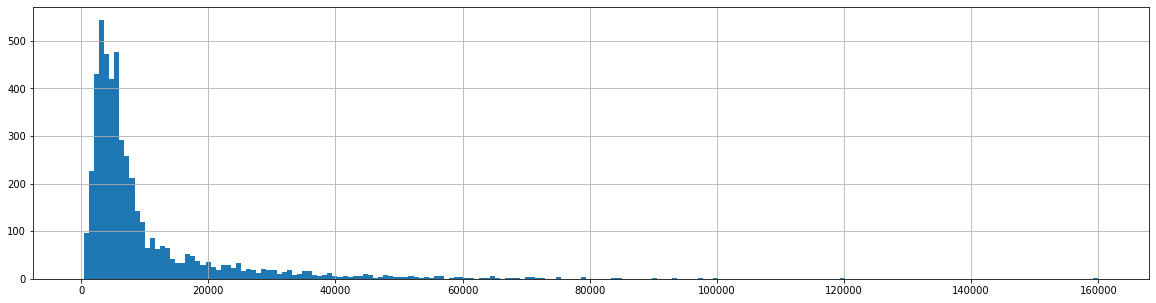

In [11]:
data_input.loc[:, "Price"].hist(figsize=(20,5), bins=200)

The distribution is obviously skewed so we it seems rather obvious that we could easily drop some obvious outliers.

<AxesSubplot:>

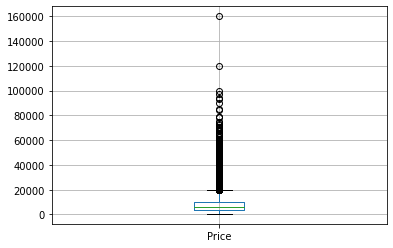

In [12]:
data_input.boxplot(column=[label_name])

In [13]:
# the unique names of the cars are
print(len(data_input["Name"].unique()))
# if there weren't so many they could actually have proven useful as a feature.
# But if we tried to use them, due to the curse of dimentionality we would definately had a serious problem with our model.

1661


The way we could actually take advantage of this feature is by extracting the actual brand of the car alone 
and check if it actually helps the model perform better

In [14]:
names = [i.lower().split(" ") for i in data_input["Name"].unique()]
syllabi = [j for i in names for j in i]
set_syllabi = set(syllabi)
counter_syllabi = Counter(syllabi)
counter_syllabi = list(counter_syllabi.items())
counter_syllabi = sorted([(i[-1],i[0]) for i in counter_syllabi])

In [15]:
counter_syllabi[::-1]

[(270, 'maruti'),
 (239, 'hyundai'),
 (162, 'at'),
 (140, 'honda'),
 (116, 'tdi'),
 (107, '1.2'),
 (106, 'toyota'),
 (106, 'mercedes-benz'),
 (99, 'ford'),
 (95, 'tata'),
 (95, 'diesel'),
 (94, 'mahindra'),
 (93, 'plus'),
 (89, 'mt'),
 (78, '1.6'),
 (77, 'skoda'),
 (76, 'bmw'),
 (73, 's'),
 (71, '1.5'),
 (66, 'crdi'),
 (66, '1.4'),
 (64, 'i20'),
 (63, 'volkswagen'),
 (63, 'audi'),
 (62, '2.0'),
 (59, 'option'),
 (58, 'vxi'),
 (55, 'sx'),
 (53, 'lxi'),
 (52, 'swift'),
 (50, 'series'),
 (47, 'verna'),
 (47, 'petrol'),
 (47, 'city'),
 (45, 'i10'),
 (44, 'cdi'),
 (43, 'sport'),
 (42, 'edition'),
 (40, 'rover'),
 (40, 'bsiii'),
 (39, 'vx'),
 (39, 'nissan'),
 (39, 'innova'),
 (38, 'titanium'),
 (38, 'renault'),
 (38, 'chevrolet'),
 (37, 'new'),
 (36, 'zxi'),
 (36, 'i'),
 (35, 'v'),
 (35, 'bsiv'),
 (35, 'asta'),
 (35, '200'),
 (33, 'seater'),
 (33, 'elegance'),
 (32, 'sportz'),
 (32, 'scorpio'),
 (32, 'r'),
 (32, 'magna'),
 (31, 'wagon'),
 (31, 'e-class'),
 (30, 'dzire'),
 (30, 'bs'),
 (29, '

In [16]:
# it is obvious that we could manually hand pick the brands of the cars, but since those names weren't in a sentence
# we can't do it in a non manual way (we could use NER instead).

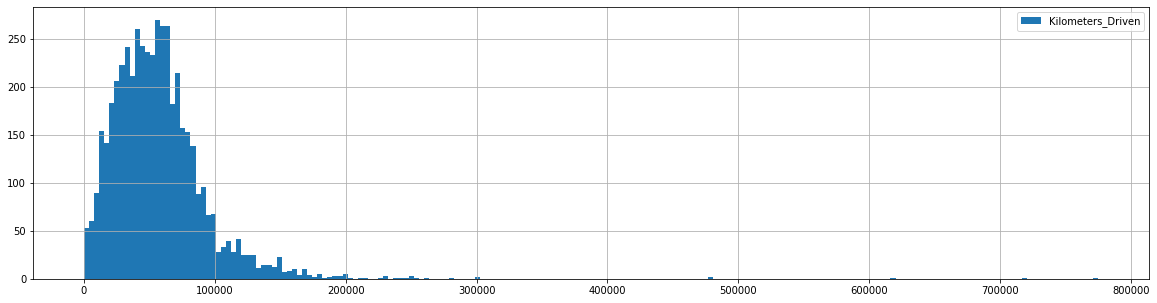

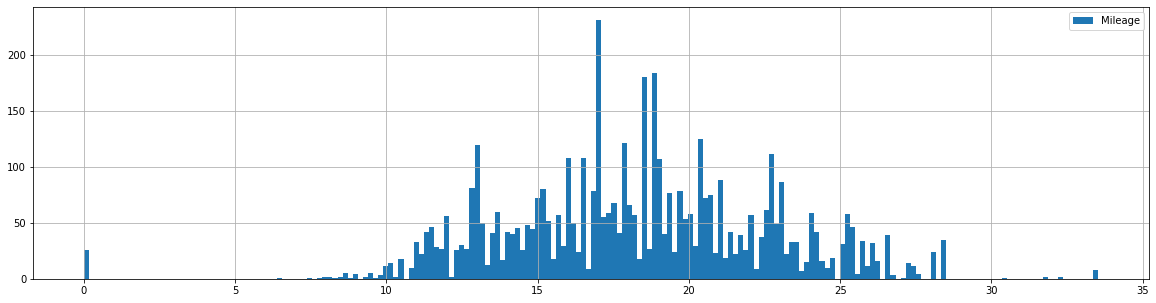

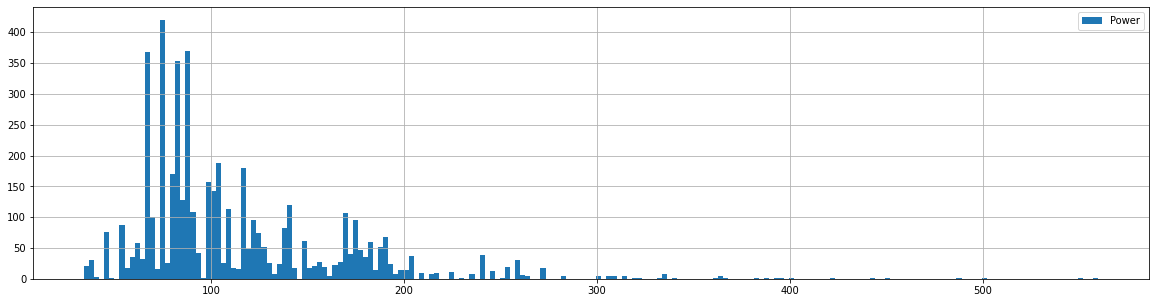

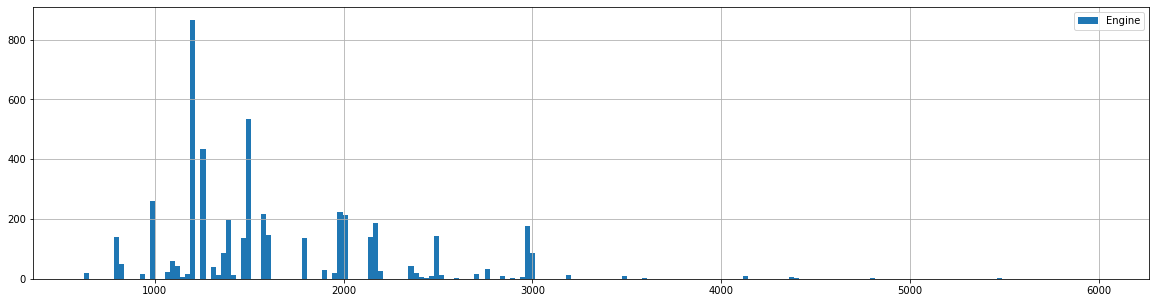

In [17]:
for i in continuous_variables:
    data_input.loc[:, i].hist(figsize=(20,5), bins=200, legend=i)
    plt.show()

Now we have to check wether there is a correlation between our features and our labels using scatter plots

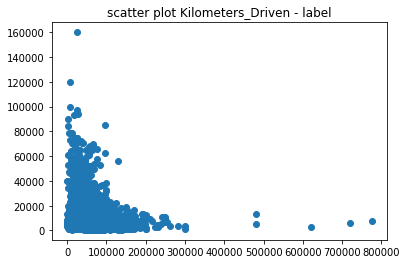

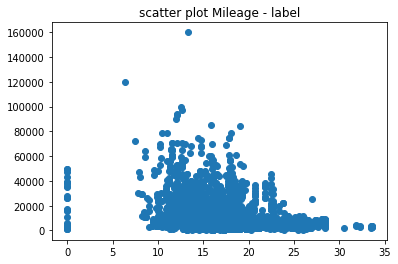

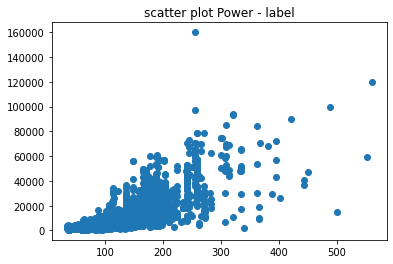

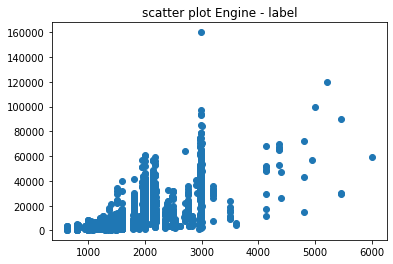

In [18]:
for i in continuous_variables:
    plt.title("scatter plot %s - label"%i)
    plt.scatter(data_input.loc[:, i].values, data_input.loc[:, label_name].values)
    plt.show()

There seems to be a severe correlation of Power and price

before we go any further and prepare for our model we need to encode all our categorical variables

In [19]:
data_input = data_input.loc[:, data_input.columns != "Name"]

In [20]:
data_input.loc[:, set(data_input.columns) - set(categorical_variables) - {"Price"}].describe()

,Power,Mileage,Kilometers_Driven,Engine,Age
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,112.853436,18.280715,57325.883432,1621.659874,7.545140
std,53.763071,4.391050,38433.648533,599.531875,3.185934
min,34.200000,0.000000,171.000000,624.000000,2.000000
25%,74.980000,15.260000,33000.000000,1198.000000,5.000000
50%,94.000000,18.200000,53000.000000,1493.000000,7.000000
75%,138.100000,21.100000,72467.000000,1968.000000,9.000000
max,560.000000,33.540000,775000.000000,5998.000000,23.000000


Show the correlation between the continuous data and the label. Correlation does not imply causation but we do get a very strong sense of the important features here, features with more variance tend to give more information to the  model.

In [21]:
data_input.loc[:, :].corr()[label_name]

Kilometers_Driven   -0.163542
Owner_Type          -0.087418
Mileage             -0.338404
Engine               0.658710
Power                0.774266
Seats                0.052659
Price                1.000000
Age                 -0.298063
Name: Price, dtype: float64

In [22]:
cat_df = data_input.loc[:, categorical_variables].copy()

In [23]:
cat_df.apply(LabelEncoder().fit_transform)

,Fuel_Type,Transmission,Owner_Type,Seats
0,3,1,1,2
1,1,1,0,4
2,3,0,0,2
3,3,1,0,2
4,1,0,0,2
...,...,...,...,...
4902,1,1,1,5
4903,1,0,0,2
4904,1,0,0,4
4905,3,1,0,2


In [24]:
enc = OneHotEncoder()
enc.fit(cat_df)
onehotlabels = enc.transform(cat_df).toarray()

In [25]:
model_ready_data = pd.concat([data_input.loc[:, continuous_variables],pd.DataFrame(onehotlabels)],axis=1)

In [26]:
continuous_variables

['Kilometers_Driven', 'Mileage', 'Power', 'Engine']

In [27]:
model_ready_data = pd.concat([model_ready_data, data_input.loc[:, label_name]], axis=1)

Before feeding it to models we will have to scale them in order not to punish the other features.
But it is paramount to create two scalers in order not to have information leakage.

In [28]:
model_ready_data.astype(float).describe()["Price"]

count      4907.000000
mean       9588.402282
std       11414.224423
min         440.000000
25%        3500.000000
50%        5680.000000
75%       10000.000000
max      160000.000000
Name: Price, dtype: float64

In [29]:
# model_ready_data.corr()[label_name]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(model_ready_data.loc[:, model_ready_data.columns!=label_name].values, data_input.loc[:, label_name].values, test_size=0.2, random_state=42)

first run without any scaling/outlier removal etc

In [31]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR

Training MAE 3754.592265247972
Training mean squared error 38991940.09352499
MAE 4092.485393252567
explained variance: r2 , 0.31657536146912846
mean squared error 60970650.56870904


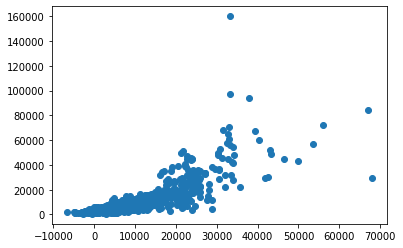

In [32]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))

print("validation MAE", mean_absolute_error(y_pred, y_test))
print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
print("validation mean squared error", mean_squared_error(y_pred, y_test))

plt.scatter(y_pred,y_test)
plt.show()

Training MAE 906.2959855972582
Training mean squared error 1837187.1894051803
validation MAE 2229.176871181263
explained variance: r2 , 0.791163533447416
validation mean squared error 26835632.621266443


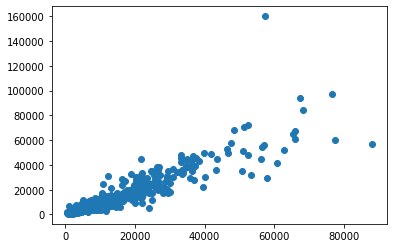

In [33]:
model = XGBRegressor()

model.fit(X_train, y_train)


print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))




y_pred = model.predict(X_test)

print("validation MAE", mean_absolute_error(y_pred, y_test))
print("explained variance: r2 ,",r2_score(y_pred, y_test))
print("validation mean squared error", mean_squared_error(y_pred, y_test))

plt.scatter(y_pred,y_test)
plt.show()

Training MAE 5938.289890275577
Training mean squared error 136254202.94722843
MAE 6559.260249274364
explained variance: r2 , -19443.681642432475
mean squared error 182328975.963638


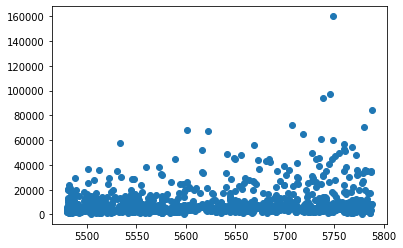

In [34]:
model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))


print("validation MAE", mean_absolute_error(y_pred, y_test))
print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
print("validation mean squared error", mean_squared_error(y_pred, y_test))

plt.scatter(y_pred,y_test)
plt.show()

In [35]:
# obviously fails because SVMs' are very sensitive to unscaled data.

In [36]:
# model_ready_data.loc[model_ready_data["Price"]>=(9588.40 + 3*11414.22),"Price"].shape

In [37]:
from sklearn.preprocessing import RobustScaler

We use RobustScaler since it's better on handling outliers

In [38]:
scx_train = RobustScaler()
scx_test = RobustScaler()

scy_train = RobustScaler()
scy_test = RobustScaler()


X_train = scx_train.fit_transform(X_train)
y_train = scy_train.fit_transform(y_train.reshape(-1, 1))


X_test = scx_train.fit_transform(X_test)
y_test = scy_train.fit_transform(y_test.reshape(-1, 1))


Training MAE 0.6007347624396705
Training mean squared error 0.99819366639424
MAE 0.6200981458665259
explained variance: r2 , 0.5237434565018171
mean squared error 1.1443668323768685


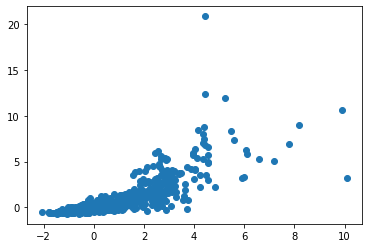

In [39]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))

print("validation MAE", mean_absolute_error(y_pred, y_test))
print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
print("validation mean squared error", mean_squared_error(y_pred, y_test))

plt.scatter(y_pred,y_test)
plt.show()

Training MAE 0.1501101851133504
Training mean squared error 0.049806627732879576
validation MAE 0.44308758241378443
explained variance: r2 , 0.7783687052269735
validation mean squared error 0.7134437045062595


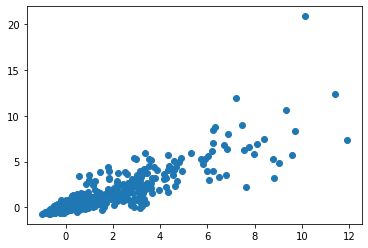

In [40]:
model = XGBRegressor()

model.fit(X_train, y_train)


print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))




y_pred = model.predict(X_test)

print("validation MAE", mean_absolute_error(y_pred, y_test))
print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
print("validation mean squared error", mean_squared_error(y_pred, y_test))

plt.scatter(y_pred,y_test)
plt.show()

/home/dlolis/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training MAE 0.4056113432012808
Training mean squared error 0.72369302292962
MAE 0.40888213135282053
explained variance: r2 , 0.6572460261432054
mean squared error 0.7631133099647787


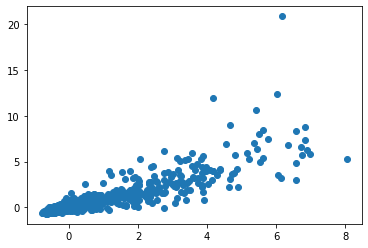

In [41]:
model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))


print("validation MAE", mean_absolute_error(y_pred, y_test))
print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
print("validation mean squared error", mean_squared_error(y_pred, y_test))

plt.scatter(y_pred,y_test)
plt.show()

In order to fix the outliers on the labels we put the in log function

In [43]:
data_input.loc[:, label_name] = data_input.loc[:, label_name].apply(np.log)
X_train, X_test, y_train, y_test = train_test_split(model_ready_data.loc[:, model_ready_data.columns!=label_name], data_input.loc[:, label_name], test_size=0.2, random_state=42)

using log transformation on the labels we eliminate the outliers, but since our features *also have outliers* we can still use RobustScaler on them

In [44]:
# scx_train = RobustScaler()
# scx_test = RobustScaler()

# X_train = scx_train.fit_transform(X_train)

# X_test = scx_train.fit_transform(X_test)

running with LinearRegression 
Training MAE 0.33425287213631083
Training mean squared error 0.18969552666307202
validation MAE 0.32494817218476124
validation explained variance: r2 , 0.7188590279947464
validation mean squared error 0.17129886665715194


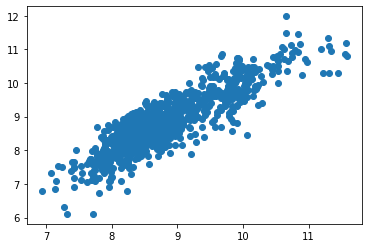

running with XGBRegressor 


/home/dlolis/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/dlolis/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Training MAE 0.12660023916402696
Training mean squared error 0.028022920602564772
validation MAE 0.2248301236994066
validation explained variance: r2 , 0.871235504059373
validation mean squared error 0.08930538918665713


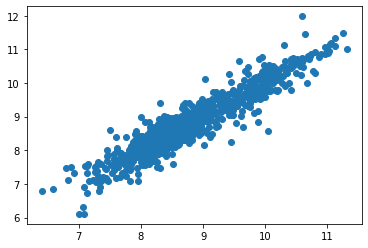

running with SVR 
Training MAE 0.5469409683596673
Training mean squared error 0.5015615568807827
validation MAE 0.5566389802386815
validation explained variance: r2 , -5.5915017207400135
validation mean squared error 0.5190879352096129


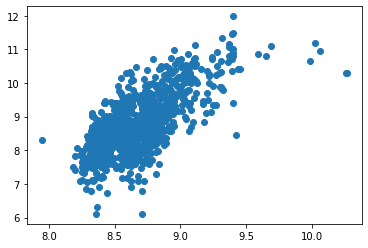

In [45]:
for model in [LinearRegression, XGBRegressor, SVR]:
    nm = model.__name__
    print("running with %s "%nm)
    model = model()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
    print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))


    print("validation MAE", mean_absolute_error(y_pred, y_test))
    print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
    print("validation mean squared error", mean_squared_error(y_pred, y_test))


    plt.scatter(y_pred,y_test)
    plt.show()

In [47]:
data_input.loc[:, label_name] = data_input.loc[:, label_name].apply(np.log)
X_train, X_test, y_train, y_test = train_test_split(model_ready_data.loc[:, model_ready_data.columns!=label_name], data_input.loc[:, label_name], test_size=0.2, random_state=42)

scx_train = RobustScaler()
scx_test = RobustScaler()

X_train = scx_train.fit_transform(X_train)

X_test = scx_train.fit_transform(X_test)

running with LinearRegression 
Training MAE 0.03908240812213697
Training mean squared error 0.002622185945886247
validation MAE 0.038177755937436685
validation explained variance: r2 , 0.7023628291644235
validation mean squared error 0.002368723104609844


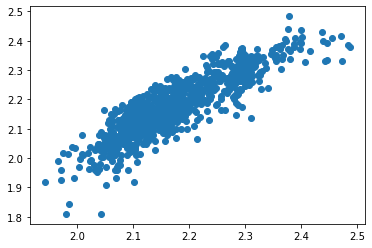

running with XGBRegressor 
Training MAE 0.015050615359770151
Training mean squared error 0.00040240929518080976
validation MAE 0.03806688924563063
validation explained variance: r2 , 0.750835272057324
validation mean squared error 0.0023766490181058295


/home/dlolis/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/dlolis/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


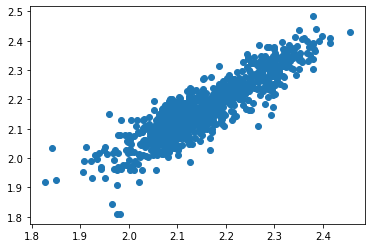

running with SVR 
Training MAE 0.04026345115734616
Training mean squared error 0.002392945249587814
validation MAE 0.044234568435336345
validation explained variance: r2 , 0.6234923085215686
validation mean squared error 0.0029145625722714107


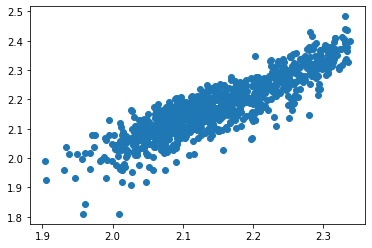

In [48]:
for model in [LinearRegression, XGBRegressor, SVR]:
    nm = model.__name__
    print("running with %s "%nm)
    model = model()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Training MAE", mean_absolute_error(model.predict(X_train), y_train))
    print("Training mean squared error", mean_squared_error(model.predict(X_train), y_train))


    print("validation MAE", mean_absolute_error(y_pred, y_test))
    print("validation explained variance: r2 ,",r2_score(y_pred, y_test))
    print("validation mean squared error", mean_squared_error(y_pred, y_test))


    plt.scatter(y_pred,y_test)
    plt.show()

Scaling both features and labels with methods that handle outliers seems to produce the best results so far.
We can go on and improve our models further by pruning features that deem unecessary using the information gained from
the correlation matrices and by producing the feature importances from xgboost